# Защита персональных данных клиентов

**Цель проекта:**

Защитить данные клиентов страховой компании.

**Задачи проекта:**
1. Разработать такой метод преобразования данных, чтобы по ним было сложно восстановить персональную информацию. 
2. Обосновать корректность его работы.
3. Защитить данные так, чтобы при преобразовании качество моделей машинного обучения не ухудшилось.

<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Загрузка-данных" data-toc-modified-id="Загрузка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Загрузка данных</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Умножение-матриц" data-toc-modified-id="Умножение-матриц-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Умножение матриц</a></span></li><li><span><a href="#Алгоритм-преобразования" data-toc-modified-id="Алгоритм-преобразования-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Алгоритм преобразования</a></span></li><li><span><a href="#Проверка-алгоритма" data-toc-modified-id="Проверка-алгоритма-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Проверка алгоритма</a></span><ul class="toc-item"><li><span><a href="#Вывод:" data-toc-modified-id="Вывод:-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Вывод:</a></span></li></ul></li><li><span><a href="#Вывод:" data-toc-modified-id="Вывод:-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Вывод:</a></span></li><li><span><a href="#Чек-лист-проверки" data-toc-modified-id="Чек-лист-проверки-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Чек-лист проверки</a></span></li></ul></div>

## Загрузка данных

In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [2]:
def data_read(file):
    """
        Функция принемает путь к файлу, выводить на экран 10 сторк таблицы,
        информацию о столбцах, число дубликатов и возврашет таблицу типа DataFrame
    """
    data = pd.read_csv(file)
    display(data.head(10))
    display(data.describe())
    data.info(memory_usage='deep')
    print("\n"+'Количество дубликатов:', data.duplicated().sum())
    return data

In [3]:
df = data_read('/datasets/insurance.csv')

,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
0,1,41.0,49600.0,1,0
1,0,46.0,38000.0,1,1
2,0,29.0,21000.0,0,0
3,0,21.0,41700.0,2,0
4,1,28.0,26100.0,0,0
5,1,43.0,41000.0,2,1
6,1,39.0,39700.0,2,0
7,1,25.0,38600.0,4,0
8,1,36.0,49700.0,1,0
9,1,32.0,51700.0,1,0


,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,0.499000,30.952800,39916.360000,1.194200,0.148000
std,0.500049,8.440807,9900.083569,1.091387,0.463183
min,0.000000,18.000000,5300.000000,0.000000,0.000000
25%,0.000000,24.000000,33300.000000,0.000000,0.000000
50%,0.000000,30.000000,40200.000000,1.000000,0.000000
75%,1.000000,37.000000,46600.000000,2.000000,0.000000
max,1.000000,65.000000,79000.000000,6.000000,5.000000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
Пол                  5000 non-null int64
Возраст              5000 non-null float64
Зарплата             5000 non-null float64
Члены семьи          5000 non-null int64
Страховые выплаты    5000 non-null int64
dtypes: float64(2), int64(3)
memory usage: 195.4 KB

Количество дубликатов: 153


Переведем столбцы типа float в int, удалим все дубликаты из таблицы, а также переведем названия всех колонок в нижний регистр.

In [4]:
df[['Возраст','Зарплата']] = df[['Возраст','Зарплата']].astype('int')
df = df.drop_duplicates().reset_index(drop=True)
df.columns = df.columns.str.lower()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4847 entries, 0 to 4846
Data columns (total 5 columns):
пол                  4847 non-null int64
возраст              4847 non-null int64
зарплата             4847 non-null int64
члены семьи          4847 non-null int64
страховые выплаты    4847 non-null int64
dtypes: int64(5)
memory usage: 189.5 KB


Построим гистограммы каждого столбца таблицы

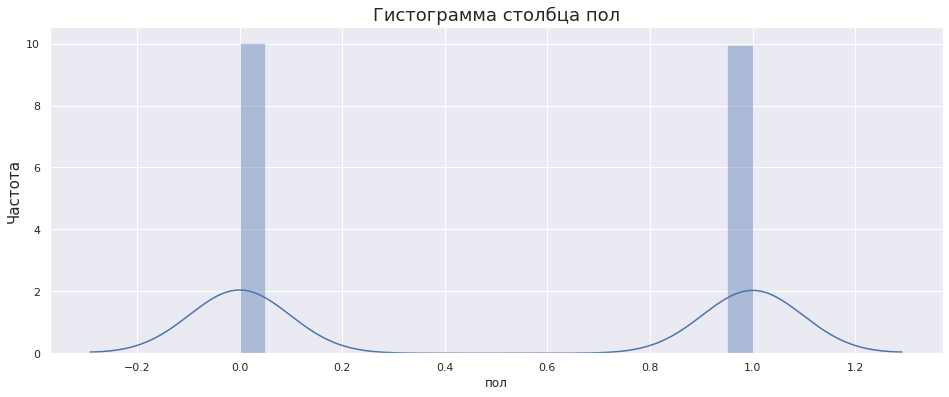

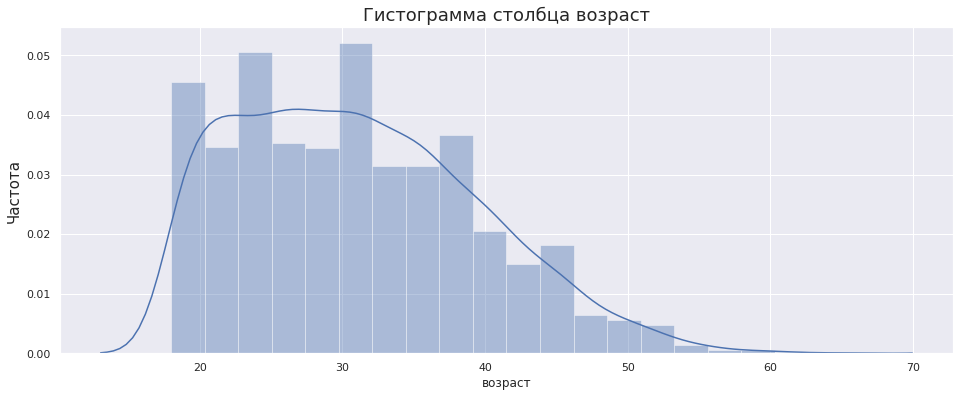

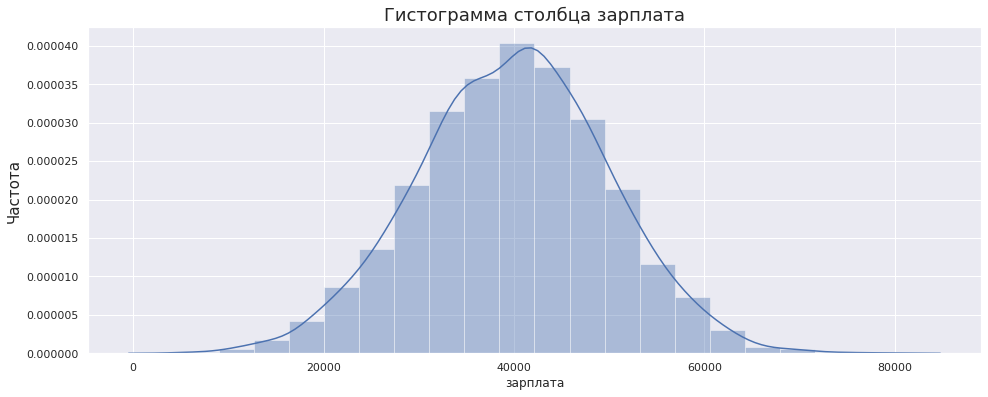

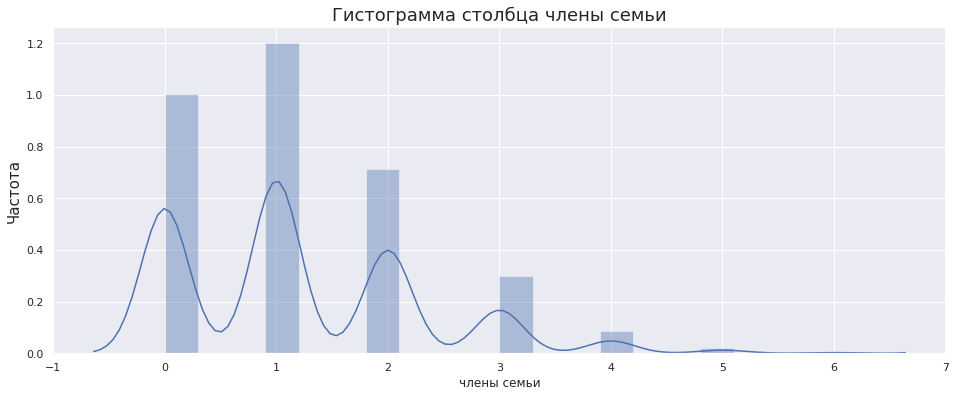

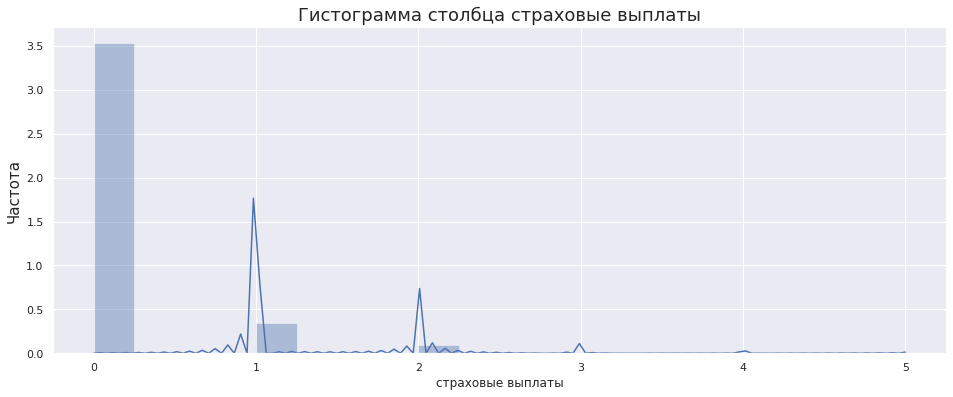

In [5]:
def show_hists(data, data_label):
    """
    Функция на вход принемает датафрейм и названия столбцов датафрейма.
    Выводом функции является цикл гистограмм каждого столбца датафрейма.
    """
    sns.set()
    plt.figure(figsize=(16, 6))
    plt.title('Гистограмма столбца ' + data_label, fontsize=18)
    plt.ylabel('Частота', fontsize=15)
    sns.distplot(data, bins=20)
    plt.show()
    
for column in df.columns:
    show_hists(df[column], column)

### Вывод



В ходе выполнения пункта 1 выявлены и удалены дублекаты значений, данные типа float перевдены в int, названия всех столбцов переведены в нижний регистр, а также построены гистограммы на осное данных всех столбцов датафрейма.

## Умножение матриц

**Вопрос:** 

Признаки умножают на обратимую матрицу. Изменится ли качество линейной регрессии?

Обозначения:

- $X$ — матрица признаков (нулевой столбец состоит из единиц)

- $y$ — вектор целевого признака

- $P$ — матрица, на которую умножаются признаки

- $w$ — вектор весов линейной регрессии (нулевой элемент равен сдвигу)

- $E$ - единичная матрица

Задача обучения:

$$
w = \arg\min_w MSE(Xw, y)
$$

Формула обучения:

$$
w = (X^T X)^{-1} X^T y
$$

Предсказания:

$$
a = Xw
$$

Свойство единичной матрицы:

$$
AE = EA = A
$$

$$
АА^{-1} = A^{-1}A = E
$$

**Доказать:**

$ a_1 = a_2 $, где $ a_1 $- предсказания данных, $ a_2 $- предсказания данных, признаки которой умножаются на матрицу P

**Решение:**

Если $ a_1 = Xw_1 $, то $ a_2 = PXw_2 $, тогда:

$ Xw_1 = PXw_2 $

$ X(X^T X)^{-1} X^T y = PX ((PX)^T PX)^{-1} (PX)^T y $

$ X(X^T X)^{-1} X^T y = PX (P^TP(X^T X))^{-1} P^T X^T y $

$ X(X^T X)^{-1} X^T y = PX (P^T)^{-1} P^{-1}(X^T X)^{-1} P^T X^T y $

$ X(X^T X)^{-1} X^T y = X(X^T X)^{-1} X^T y $

**Ответ:** 

При умножении матрицы признаков на случайную обратимую матрицу, качество линейной регрессии не изменится.

## Алгоритм преобразования

**Алгоритм**

Создадим случайную матрицу размера MxM, где M равна ширине матрицы признаков. Далее умножим матрицу признаков на данную случайную обратимую матрицу.

**Обоснование**

Обоснование приведено в пункте 2

## Проверка алгоритма

Обучим модель и проверим её качество с помошью библиотеки sklearn 

In [6]:
target = df['страховые выплаты']
features = df.drop('страховые выплаты', axis=1)
train_features, valid_features, train_target, valid_target = train_test_split(features, target,
                                                                              test_size=0.25, random_state=12345)

In [7]:
%%time
model = LinearRegression().fit(train_features, train_target)
valid_predicted = np.around(model.predict(valid_features)).astype('int')
r2_skl =  r2_score(valid_target, valid_predicted)
print('R-квадрат:', r2_skl)

R-квадрат: 0.6058148129897009
CPU times: user 6.3 ms, sys: 0 ns, total: 6.3 ms
Wall time: 5.03 ms


Обучим модель и проверим её качество с помощью матричного умножения

In [8]:
%%time
class LinearRegression:
    def fit(self, train_features, train_target):
        y = train_target
        X = np.concatenate((np.ones((train_features.shape[0], 1)), train_features), axis=1)
        w = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)
        self.w = w[1:]
        self.w0 = w[0]

    def predict(self, test_features):
        return np.around(test_features.dot(self.w) + (self.w0)).astype('int')
    
model = LinearRegression()
model.fit(train_features, train_target)
predictions = model.predict(valid_features)
r2_mat = r2_score(valid_target, predictions)
print('R-квадрат:', r2_mat)

R-квадрат: 0.6058148129897009
CPU times: user 29.8 ms, sys: 23.7 ms, total: 53.6 ms
Wall time: 12.4 ms


Обучим модель и проверим её качество на преобразованных данных

In [9]:
P = np.random.sample((4,4))
#Проверка матрицы на обратимость
np.around(np.linalg.inv(P).dot(P))

array([[ 1.,  0.,  0.,  0.],
       [-0.,  1., -0., -0.],
       [ 0.,  0.,  1.,  0.],
       [-0., -0.,  0.,  1.]])

Полученная случайная матрица является обратимой

In [10]:
features = features.values
features_transformed = features.dot(P)
features_transformed

array([[37447.83743939, 16653.2228155 ,  7251.21419042,  3689.30759545],
       [28697.44793821, 12762.59485216,  5560.22747444,  2832.5289894 ],
       [15861.07813889,  7053.73900659,  3073.66741407,  1566.68607718],
       ...,
       [25589.38559087, 11379.70781542,  4953.77710388,  2518.46221736],
       [24686.10528462, 10979.52127377,  4780.22056143,  2430.83343824],
       [30649.90995051, 13630.00982811,  5933.73413979,  3017.63312926]])

In [11]:
train_features, valid_features, train_target, valid_target = train_test_split(features_transformed, target,
                                                                              test_size=0.25, random_state=12345)

In [12]:
%%time
model = LinearRegression()
model.fit(train_features, train_target)
predictions_trans = model.predict(valid_features)
r2_trans = r2_score(valid_target, predictions_trans)
print('R-квадрат:', r2_trans)

R-квадрат: 0.6058148129897009
CPU times: user 7.69 ms, sys: 866 µs, total: 8.55 ms
Wall time: 2.07 ms


### Вывод:

В данном пункте запрограммирован алгоритм шифрования данных с применением матричных операций. Метрикой R2 проверено качество моделей до и после преобразования данных.

In [13]:
d = ({'метрика R2':[r2_skl, r2_trans]})
df = pd.DataFrame(data=d, index=['модель до преобразования','модель после преобразования'])
df

,метрика R2
модель до преобразования,0.605815
модель после преобразования,0.605815


Таблица выше говорит о том, что качество модели не менятся при преобразовании данных.

## Вывод:

В ходе выполнения проекта о защите персональных данных клиента проведены следующие шаги:

1) Загружены данные. Выявлены и удалены дубликаты значений, данные типа float переведены в int, названия всех столбцов переведены в нижний регистр, а также построены гистограммы на основе данных всех столбцов датафрейма.

2) Обосновано утверждение, что при умножении матрицы признаков на случайную обратимую матрицу, качество линейной регрессии не изменится.

3) Приведен алгоритм преобразования данных.

4) Запрограммирован алгоритм шифрования данных с применением матричных операций. Метрикой R2 проверено качество моделей до и после преобразования данных и выяснено, что метрика качества не меняется и равна 0.61.